# Лабораторная работа №3

- [Предварительная обработка](#1)
- [Разбиение данных](#2)
- [Создание сети](#3)
- [Обучение нейронной сети](#4)
- [Тепловая карта кластеризации](#5)
- [Оценка точности](#6)
- [Дополнительное задание](#extra)
- [Выводы](#7)

## Предварительная обработка <a id='1'></a>

В начале выполнения данной лабораторной работы необходимо перед основными действиями обработать данные от *пропусков*, *явных* и *неявных* *дубликатов* и *привести столбцы* к правильным типам данных. Для проведения каждого из данных действий в библиотеке **Pandas** существуют отдельные функции.

Для начала, необходимо импортировать библиотеку **Pandas** в Python и загрузить в датафрейм из CSV-файла:

In [1]:
import pandas as pd

read_csv = pd.read_csv('4heart2.csv', sep=',')
data = pd.DataFrame(read_csv)

Также, при помощи импорта библиотеки "`warnings`" уберём все предупреждения, которые точно появятся при дальнейшей работе.

In [2]:
import warnings
warnings.filterwarnings('ignore')

Далее, выведем первые **20** строк в получившейся таблице, чтобы оценить качество данных на предмет необходимости *обработки от пропусков*:

In [3]:
data.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Исходя из первых 20 строк данного датасета, можно сделать вывод о том, что необходимо изменить тип данных одного столбца, а именно - "`age`". Также, необходимо изменить название столбца "`DEATH_EVENT`" и привести к виду, в котором все символы имеют нижний регистр, а пробелы между словами заполняются символом нижнего подчеркивания.

Изменение *типа данных* столбца происходит при помощи функции "`.astype()`", которая вызывается для столбца. В качестве параметров в данный метод передаётся тип данных, на который необходимо изменить столбец.      
Изменение *названия* столбца происходит при помощи метода "`.rename()`", которая используется для всего датафрейма. И в качестве параметров передаются названия столбцов, которые необходимо изменить.      

Проверка изменения проводиться при помощи метода "`.info()`":

In [4]:
data['age'] = data['age'].astype(int)
data = data.rename(columns={'DEATH_EVENT': 'death_event'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int32  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(2), int32(1), int64(10)
memory usage: 29.3 KB


Далее, проверим исходный датасет на наличие **пропусков**, или же *пустых значений*. Данное действие производиться при помощи специального метода `.isna()`, который ищет все пропуски в таблице. А вместе с ним используют метод `.sum()`, который просуммирует и выведет количество пустых значений в таблице.

In [5]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

Из вышеприведённого окна видно, что в исходном датасете проверка на пропуски показала их *полное отсутствие*, что очень хорошо.

Далее, следующим этапом при предварительной обработке данных является **поиск дубликатов**.

Поиск дубликатов обычно делиться на 2 типа: *поиск явных дубликатов* и *поиск неявных дубликатов*. Начнем с первого случая.

Для поиска явных дубликатов используется функция "`.duplicated()`", которая просто ищет дубликаты. По умолчанию данный метод признает дубликатами те строки, которые полностью повторяют уже встречавшиеся в датасете. 
Т.е. метод, как и в случае с методом "`.isna()`", выводит значения либо **True**, либо **False**. Поэтому для понимания количества дубликатов добавляют, как и в предыдущем случая, функцию "`.sum()`".

In [6]:
data.duplicated().sum()

0

Получается, что **полностью повторяющихся строк в данном датасете нету**, что хорошо.

Теперь займемся поиском неявных дубликатов. Для этого используют метод "`.unique()`" для каждого столбца датасета. И чтобы вручную не писать этот метод для каждого столбца, гораздо проще будет создать цикл, который будет проходить по массиву, созданному по всем названиям столбцов.

In [7]:
col = data.columns
for column in col:
    print(data[column].unique())

[75 55 65 50 90 60 80 62 45 49 82 87 70 48 68 53 95 58 94 85 69 72 51 57
 42 41 67 79 59 44 63 86 66 43 46 61 81 52 64 40 73 77 78 54 47 56]
[0 1]
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334 2442  776
  196  835 3966  171  198   95 1419  478  176  395   99  145  104 1896
  151  244   62  121  418  167 1211 1767  308   97   64  101  212 2281
  972  131  135 1202  427 1021  118   86  675   57 2794   56  211  166
 

В ходе поиска неявных дубликатов обычно ищут:
- альтернативные варианты написания одного и того же значения;
- ошибочные написания.

И как видно из выводимого сообщения выше, в данном датасете **отсутствуют неявные дубликаты**.

И подводя итог, можно сделать вывод о том, что **в данном датасете нету никаких дубликатов**, ни явных, ни неявных.

Таким образом, подводя итог данной части лабораторной работы, можно сделать вывод о том, что *предварительная обработка данных прошла успешно*. Значит, можно приступать к остальным этапам лабораторной работы.


## Разбиение данных <a id='2'></a>

После завершения процесса предварительной обработки данных необходимо нормализовать входные данные, не трогая при этом целевой показатель.

In [8]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaled_features = scaler.fit_transform(data.drop('death_event', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns= data.drop('death_event', axis=1).columns)
scaled_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.193302,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.490896,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.351203,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.911945,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.351203,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098573,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.490896,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.332995,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.332995,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


Теперь, после завершения всех предварительных действий, можно приступить к разделению датасета на обучающие и тестовые данные. Для этого все в той же библиотеки `scikit-learn` необходимо импортировать класс `train_test_split` из модуля `model_selection`.

In [9]:
from sklearn.model_selection import train_test_split

Затем, необходимо указать значения `X` и `Y`, которые будут переданы в функцию `train_test_split()`. В данном случае значение `x` представляет из себя датафрейм `scaled_data`, который хранит в себе стандартизованные данные всей исходной таблицы. Значение `y` хранит в себе значения из столбца `'death_event'` исходного датасета. Другими словами, `y` хранит в себе значение ключевого столбца исходного набора данных

In [10]:
x = scaled_data     # Стандартизованные данные для обучения и тестирования
y = data['death_event']     # Список результатов для обучения и тестирования

И наконец, необходимо запустить функцию `train_test_split()`, передав в данную функцию в качестве параметров переменные `x` и `y`, а также параметр `test_size`, значение которого влияет на объем тестовой выборки относительно всей. В данном случае объем тестовой выборке равняется **трети** от всего датасета. Также, выведем размеры тренировочной и тестовой выборок.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
print(f'x_train:{x_train.shape}, x_test:{x_test.shape}\ny_train:{y_train.shape},    y_test:{y_test.shape}')

x_train:(200, 12), x_test:(99, 12)
y_train:(200,),    y_test:(99,)


## Создание сети <a id='3'></a>

Перед началом работ по созданию нейронной сети Кохонена необходимо импортировать все используемые библиотеки:

In [14]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, silhouette_score

Далее необходимо инициализировать гиперпараметры создаваемой сети. В данном случае это: 
- `num_neurons` - количество нейронов в SOM сетке; 
- `grid_size` - размер сетки; 
- `max_steps` - количество шагов обучения; 
- `max_learning_rate` - максимальная скорость обучения; 
- `max_distance` - наиболее удалённый сосед.

In [15]:
# Гиперпараметры:
num_neurons = 5*np.sqrt(x_train.shape[0])       # Количество нейронов
grid_size = int(np.ceil(np.sqrt(num_neurons)))  # Размер SOM сетки
max_steps = int(500*grid_size**2)               # Количество шагов обучения 
max_learning_rate = 0.5                         # Максимальная скорость обучения
max_distance = 2                                # Максимальное расстояние для соседей

Основа работы сети - SOM-карта, которая состоит из сетки размером (`grid_size` x `grid_size` x `num_dims`), где `num_dims` - размер одной строки входных данных.

In [16]:
# Создаем SOM-карту
num_dims = x_train.shape[1]                     # Размер одной строки входных данных
np.random.seed(1)
som = np.random.random_sample(size=(grid_size, grid_size, num_dims)) # Создание карты

## Обучение нейронной сети <a id='4'></a>

Данная нейронная сеть отличается от реализованных ранее тем, что её обучение происходит *без учителя*. Это означает, что нейронная сеть сама определяет, к какому классу принадлежит массив параметров. Для обучения данной нейронной сети были реализованы 2 вспомогательные функции: `winning_neuron` и `attenuation`. Рассмотрим первую из них.

Функция `winning_neuron` ищет *нейрон-победитель* среди всех нейронов в SOM-сетке, используя при этом Евклидово расстояние. На вход в данную функцию подаются следующие параметры:
- `data` - обучающая выборка;
- `index` - случайный индекс элемента из обучающей выборки;
- `som` - SOM-сетка с весами;
- `num_rows` = `num_cols` - размер SOM-сетки.

На выходе из данной функции получается расположение победившего нейрона для поставляемых данных.

In [17]:
# Поиск нейрона победителя
def winning_neuron(data, index, som, num_rows, num_cols):
    winner = [0,0]                                                    # Победитель
    shortest_distance = data.shape[1]                                 # Инициализаруем минимальное расстояние наибольшим значением 
    for row in range(num_rows):
      for col in range(num_cols):
        distance_ = distance.euclidean(som[row][col], data.iloc[index])     # Евклидово расстояние между нейроном и случайными данными
        if distance_ < shortest_distance:                              # Ищем минимальное расстояние
          shortest_distance = distance_                                # Минимальное расстояние - нейрон победитель
          winner = [row,col]
    return winner

Далее рассмотрим вторую из созданных вспомогательных функций, а именно `attenuation`. Исходя из названия, данная функция уменьшает значения параметров в процессе обучения сети, а именно радиус соседей и скорость обучения. На вход данной функции подаются значения:
- `step` - текущий шаг обучения;
- `max_step` - общее количество шагов обучения;
- `max_learning_rate` - наибольшая скорость обучения;
- `max_distance` - наибольший радиус для соседей.

На выходе из данной функции получаются изменённые значения скорости обучения и радиуса соседей.

In [18]:
# Функция для уменьшения скорости обучения и расстояния между соседями
def attenuation(st, max_st, max_lr, max_dis):
    factor = 1.0 - (np.float64(st)/max_st)                          # Параметр уменьшения 
    lr = factor*max_lr                                              # Скорость обучения
    neigh_range = np.ceil(factor * max_dis)                         # Расстояние между соседями
    return lr, neigh_range

И затем, идёт основная функция для обучения нейронной сети. Суть данной функции заключается в том, что она производит процесс обучения путём изменения весовых коэффициентов у нейронов из SOM-карты. В качестве входных параметров у данной функции выступают:
- `max_step` - общее количество шагов обучения;
- `som` - SOM-сетка с весами;
- `max_learning_rate` - наибольшая скорость обучения;
- `max_distance` - наибольший радиус для соседей;
- `x_train` - обучающая выборка;
- `grid_size` - размер SOM-сетки.

В качестве выходных параметров функция передаёт только обученную SOM-карту.

In [19]:
# Функция обучения сети
def training(max_steps, som, max_learning_rate, max_distance, x_train, grid_size):
    for step in range(max_steps):
        if step+1 % 500 == 0:
           print(f'Шаг: {step+1}')                                                       # Цикл по количеству шагов обучения
        learning_rate, neighbourhood_range = attenuation(step, max_steps, max_learning_rate, max_distance)    # Уменьшение скорости обучения + расстояния между соседями
        rand_index = np.random.randint(0,high=x_train.shape[0])
        winner = winning_neuron(x_train, rand_index, som, grid_size, grid_size)         # Поиск нейрона победителя
        for row in range(grid_size):
           for col in range(grid_size):                                                 # Цикл для поиска соседей
                if distance.cityblock([row, col], winner) <= neighbourhood_range:
                    som[row][col] += learning_rate*(x_train.iloc[rand_index]-som[row][col])     # Процесс адаптации(изменение весов соседей)
    print('Обучение завершено!')
    return som

som = training(max_steps, som, max_learning_rate, max_distance, x_train, grid_size)

Обучение завершено!


## Тепловая карта кластеризации <a id='5'></a>

На следующем этапе необходимо создать тепловую карту кластеризации исходной SOM-сетки. Для этого в начале необходимо создать массив меток значений. Затем, создать сетку, по размерам такую же, как и SOM-карта. В данную сетку будут записываться значения меток классов для каждого нейрона. Далее, для каждого элемента из тренировочного набора данных искать нейрон победитель, запоминать его координаты. И наконец, в ячейку победившего нейрона записывать значение метки.

In [20]:
# Сбор меток
label_data = y_train                # Массив меток
map = [[[] for i in range(grid_size) ] for j in range(grid_size)]     # Сетка с метками классов

for t in range(x_train.shape[0]):
    winner = winning_neuron(x_train, t, som, grid_size, grid_size)    # Поиск нейрона победителя
    map[winner[0]][winner[1]].append(label_data.iloc[t])                   # В ячейку победившего нейрона записываем значение метки

После создания сетки меток, необходимо создать карту меток, которая затем будет визуализирована. Процесс создания ячейки из карты меток достаточно прост: берём значение из сетки с метками и смотрим на её длину. Если длина значения = 0, тогда в ячейку из карты меток записывается 2. Иначе, если длина != 0, тогда в ячейку карты записывается наибольшее значение из сетки с метками

In [21]:
# Создаем карту меток
label_map = np.zeros(shape=(grid_size, grid_size),dtype=np.int64)     # Карта меток
for row in range(grid_size):
  for col in range(grid_size):
    label_list = map[row][col]                                        # Рассматриваем элемент из сетки с метками классов
    if len(label_list)==0:              # Если нейрон является пустым(значение из сетки класса пустое)
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

А затем, полученная карта меток визуализируется при помощи метода `imshow()` из библиотеки `matplotlib`.

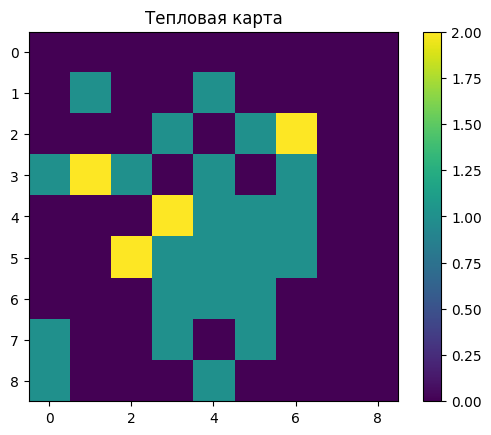

In [22]:
plt.imshow(label_map)
plt.colorbar()
plt.title('Тепловая карта')
plt.show()

## Оценка точности <a id='6'></a>

После завершения процесса обучения, для сравнения точности классификации данной нейронной сетью и тремя другими методами, необходимо найти точность классификации. Данное действие выполняется крайне просто:
- Выбирается значение из тестировочного массива записей;
- Подбирается нейрон победитель для выбранного значения;
- Записывается значение из карты меток с координатами нейронами победителя;
- Запоминается значение в массив победителей;
- Оценивается точность определения.

In [23]:
winner_labels = []

for t in range(x_test.shape[0]):
   winner = winning_neuron(x_test, t, som, grid_size, grid_size)
   row = winner[0]
   col = winner[1]
   predicted = label_map[row][col]
   winner_labels.append(predicted)

print("Accuracy score: ",accuracy_score(y_test, np.array(winner_labels)))

Accuracy score:  0.7373737373737373


Далее приведём точности определения для сетей, которые были реализованы на предыдущем семестре
- *accuracy* для k-ближайших соседей - **0.77**;
- *accuracy* для логистической регрессии - **0.87**;
- *accuracy* для случайного леса - **0.89**.

Если сравнить результаты оценки точности, полученные ранее, с теми, которые получены сейчас, то можно сделать вывод о том, что все три модели, реализованные ранее, оказались гораздо более точными, в отличии от нейронной сети, реализованной сейчас.

## Дополнительное задание <a id='extra'></a>

В качестве дополнительного задания необходимо найти метрику силуэта и сравнить её с теми, которые были при создании в предыдущем семестре. В начале приведём значения метрики силуэта из прошлого: **0.08867716989574566**. Затем выведем текущее значение метрики силуэта, полученное благодаря нейронной сети.

In [29]:
print('silhouette_score: ', silhouette_score(x_test, winner_labels))

silhouette_score:  -0.071708826987109


Коэффициент силуэта рассчитывается с использованием среднего внутрикластерного расстояния и среднего расстояния до ближайшего кластера для каждого образца. Лучшее значение - 1,а худшее - -1.Значения около 0 указывают на перекрытие кластеров. Отрицательные значения обычно указывают на то,что выборка была назначена не тому кластеру,так как другой кластер более похож.

## Выводы <a id='7'></a>

Таким образом, в ходе выполнения данной лабораторной работы мною был изучен новый тип нейронных сетей, а именно SOM-карты, или же нейронная сеть Кохонена. Я разобрался с логикой работы данного алгоритма, а также реализовал его при помощи языка программирования Python. На этапе оценки точности работы алгоритма было получено, что данная сеть обладает куда меньшей точностью классификации, чем методы k-ближайших соседей, логистической регрессии или случайного леса.